In [ ]:
import sys
import os
sys.path.append(os.path.abspath(".."))

from pathlib import Path
import torchaudio

from ml.dataset import create_spectrogram, get_number_of_fourier_transform_bins, create_mel_spectrogram
from ml.vision import show_and_save_spectrogram_image, plot_fourier_transform, plot_waveform, show_mel_spectrogram
from ml.vision import visualize_transform

# Sine wave: waveform, fourier transform and spectrogram

In [2]:
path = Path.home() / '.data/sinewave.wav'
waveform, sample_rate = torchaudio.load(path)

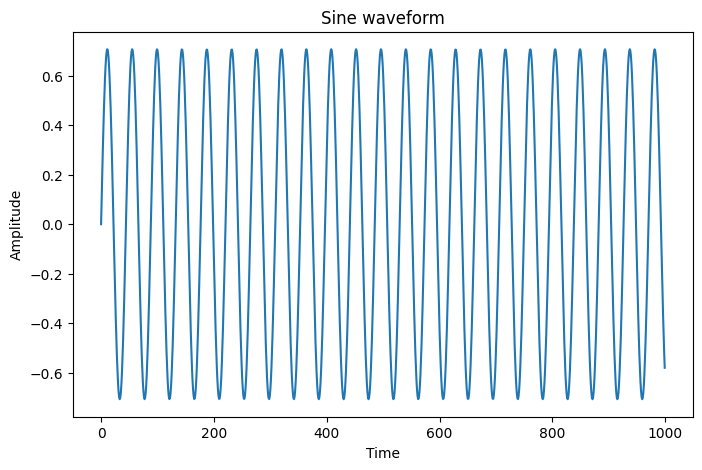

In [3]:
plot_waveform(waveform)

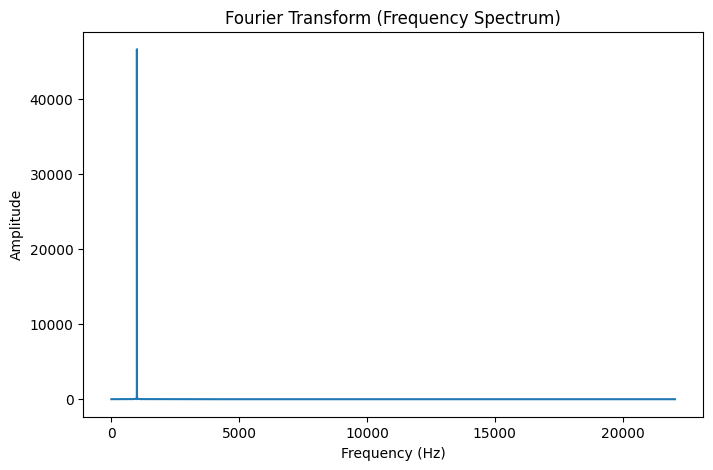

In [4]:
plot_fourier_transform(waveform, sample_rate)

## Visualize some spectrograms

In [6]:
base_file_path = Path.home() / '.data/petal/pre-labeled/audio'
angry = 'angry/'
disgusted = 'disgusted/'
fearful = 'fearful/'
happy = 'happy/'
neutral = 'neutral/'
sad = 'sad/'
surprised = 'surprised/'

In [7]:
def get_random_files(directory: Path, num_files: int = 5):
    directory_path = Path(directory)
    
    if not directory_path.is_dir():
        raise ValueError(f"{directory} is not a valid directory")
    
    all_files = [file for file in directory_path.iterdir() if file.is_file()]
    
    if len(all_files) < num_files:
        raise ValueError(f"Not enough files in the directory. Found {len(all_files)}, needed {num_files}")
    
    return random.sample(all_files, num_files)

In [8]:
file_paths = []
file_paths += get_random_files(base_file_path / angry)
file_paths += get_random_files(base_file_path / disgusted)
file_paths += get_random_files(base_file_path / fearful)
file_paths += get_random_files(base_file_path / happy)
file_paths += get_random_files(base_file_path / neutral)
file_paths += get_random_files(base_file_path / sad)
file_paths += get_random_files(base_file_path / surprised)

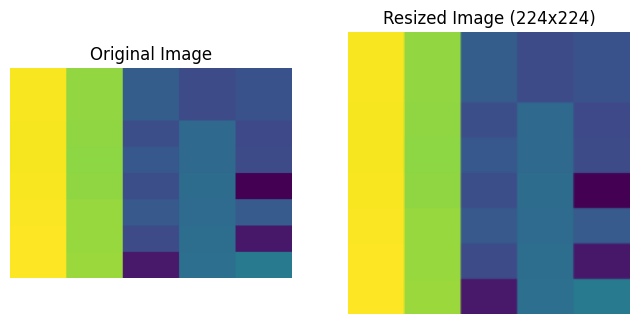

In [9]:
visualize_transform(
    image_path=Path.home() / '.data/petal/pre-labeled/spectrograms/angry/spec_img0.png',
    transform=transforms.Resize((224, 224))
)

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/angry/basilikum_142hz_1738520880850_6_90.wav--------------------------


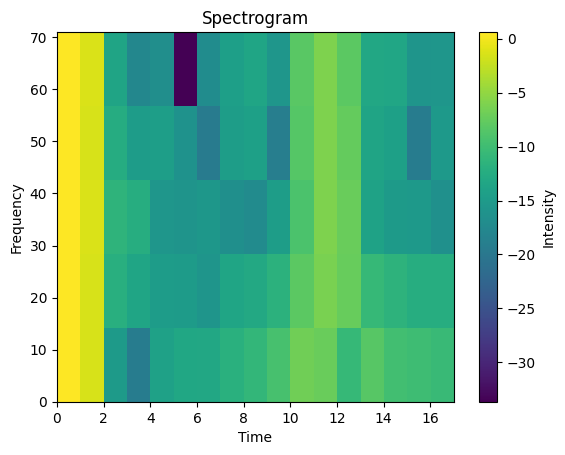

/home/dlonghi1_jm/Projects/plant_emotion_classification/venv/lib/python3.10/site-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (64) may be set too high. Or, the value for `n_freqs` (17) may be set too low.
  warnings.warn(


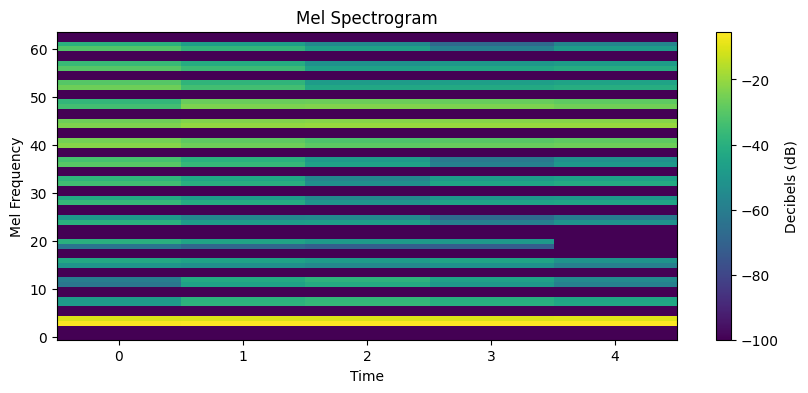

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/angry/31_manuel_basilikum1_150hz_1738757065367.0_151.wav--------------------------


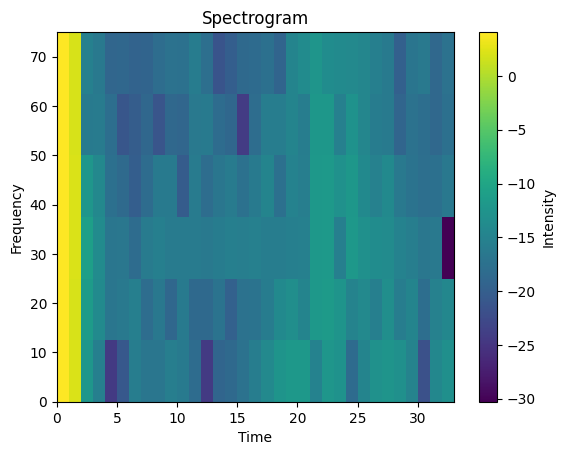

/home/dlonghi1_jm/Projects/plant_emotion_classification/venv/lib/python3.10/site-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (64) may be set too high. Or, the value for `n_freqs` (33) may be set too low.
  warnings.warn(


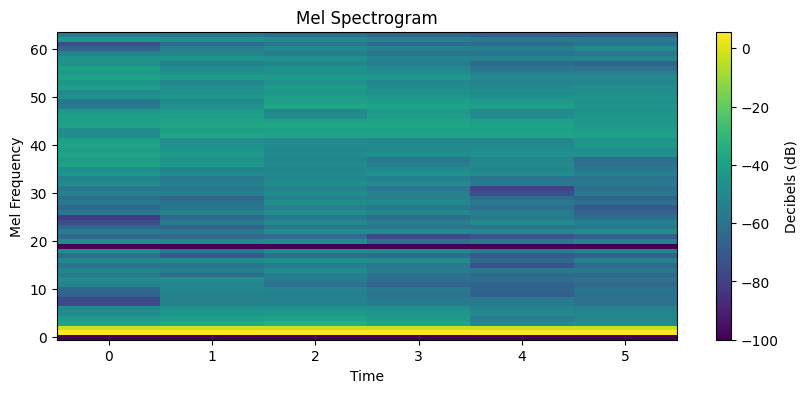

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/angry/31_manuel_basilikum1_150hz_1738756887070.0_75.wav--------------------------


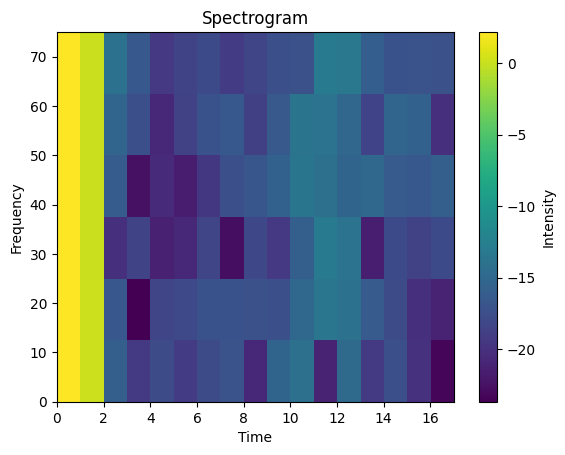

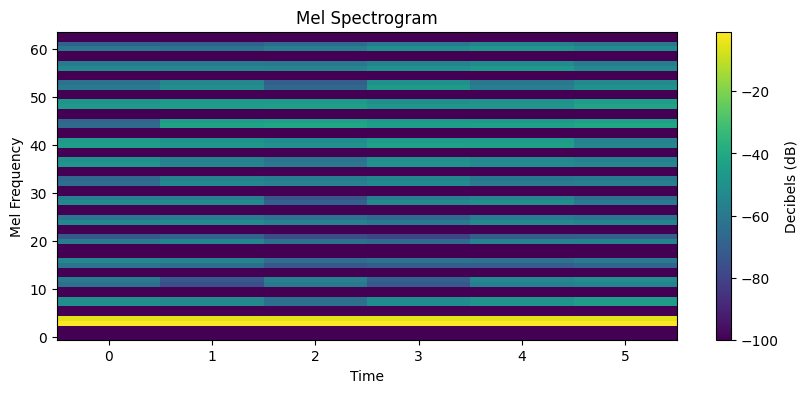

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/angry/17_william_basilikum_142hz_1738688297413.0_31.wav--------------------------


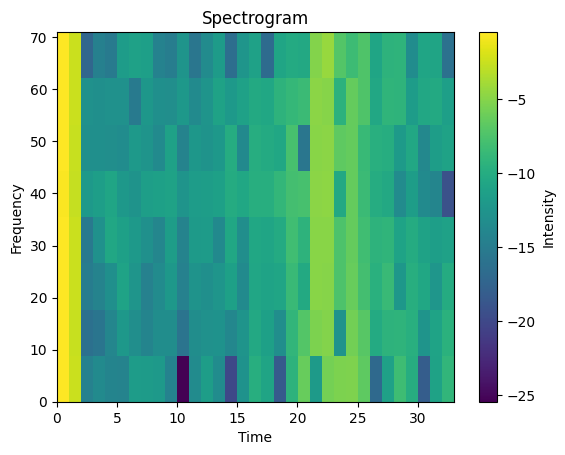

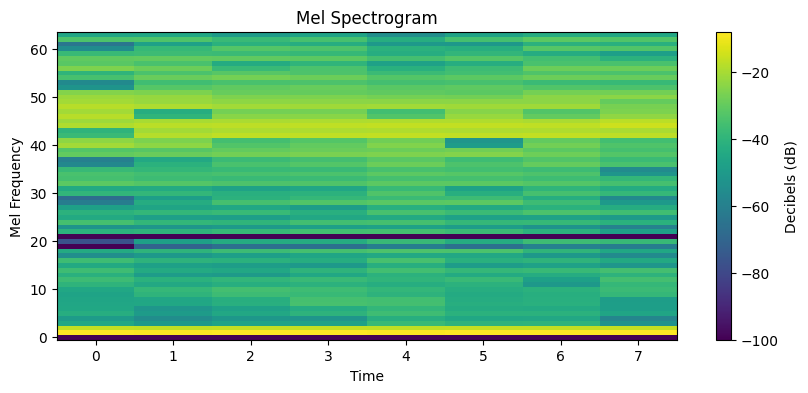

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/angry/31_manuel_basilikum1_150hz_1738757154560.0_205.wav--------------------------


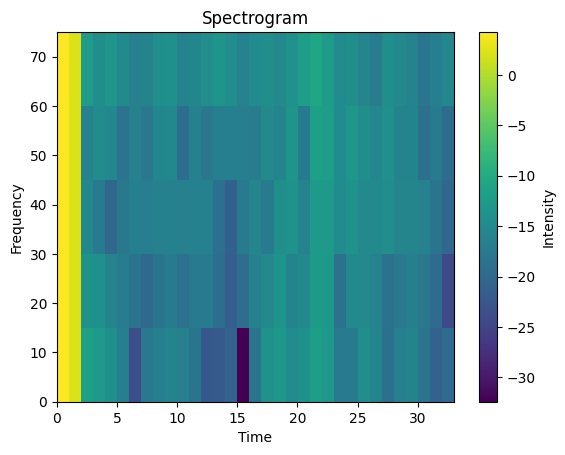

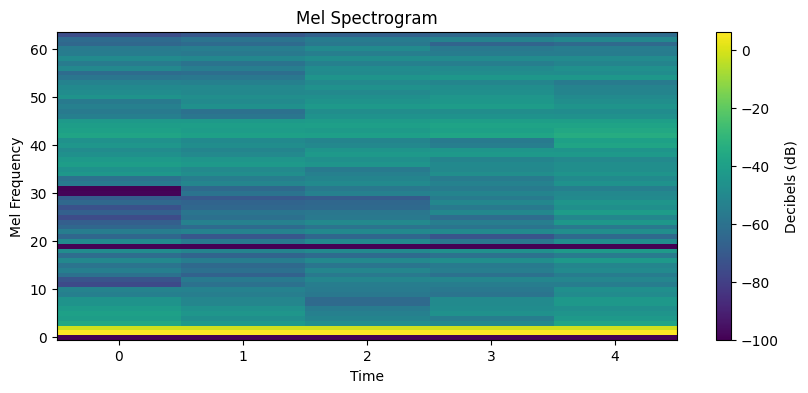

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/disgusted/62_veronika_basilikum_142hz_1739455272638.0_34.wav--------------------------


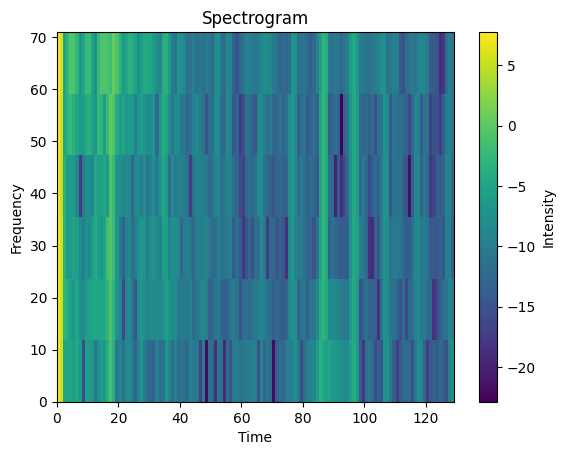

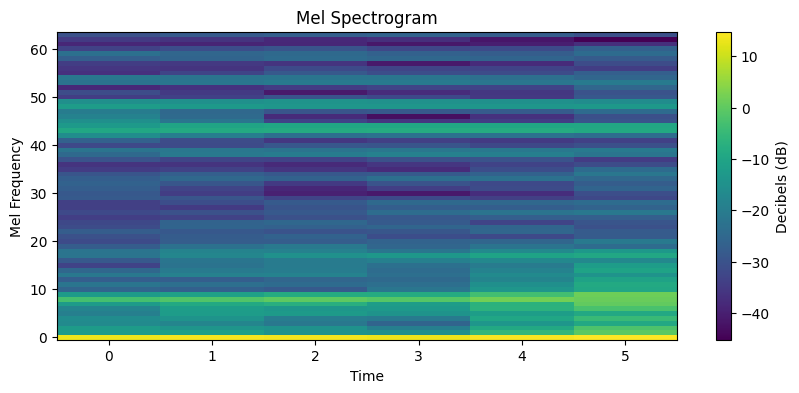

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/disgusted/64_anna_basilikum_142hz_1739457852934.0_20.wav--------------------------


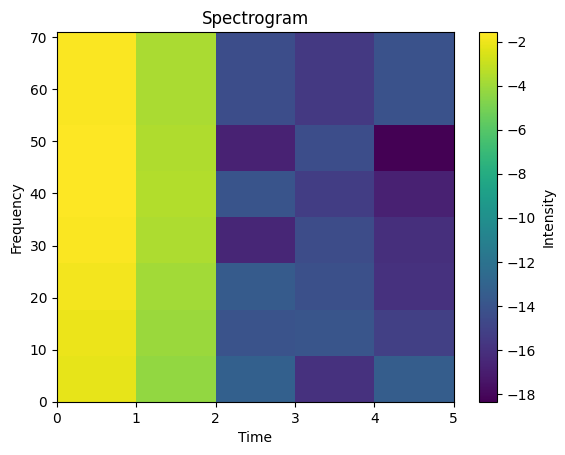

/home/dlonghi1_jm/Projects/plant_emotion_classification/venv/lib/python3.10/site-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (64) may be set too high. Or, the value for `n_freqs` (5) may be set too low.
  warnings.warn(


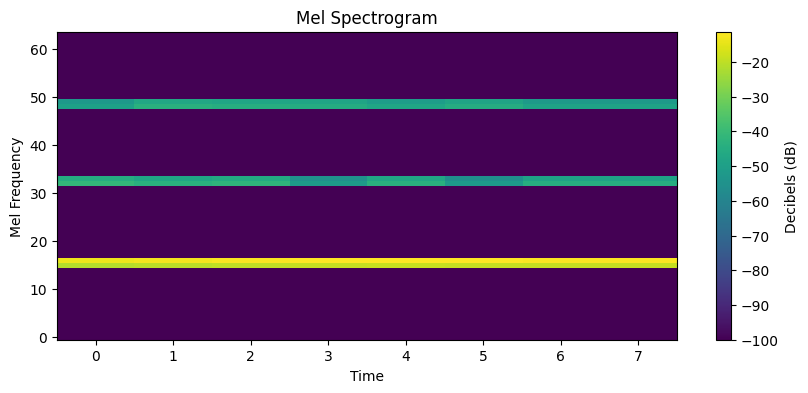

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/disgusted/53_lars_basilikum_142hz_1739288077549.0_57.wav--------------------------


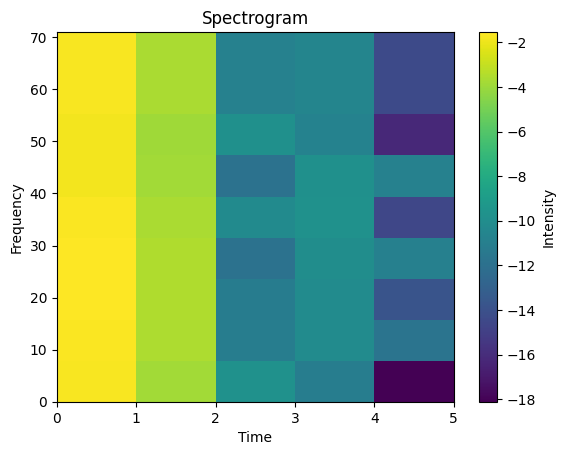

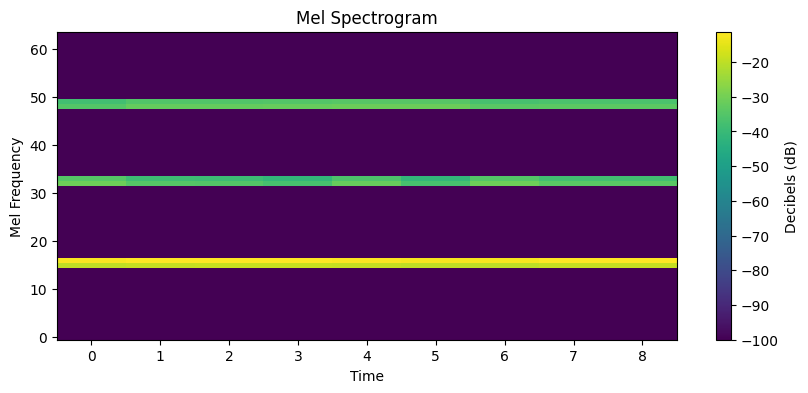

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/disgusted/32_anna_basilikum1_142hz_1738757734682.0_33.wav--------------------------


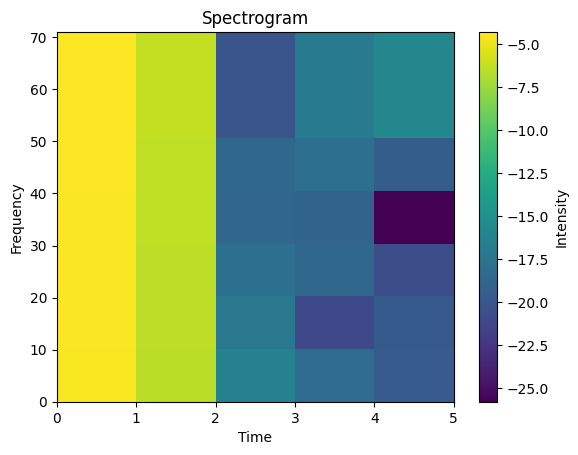

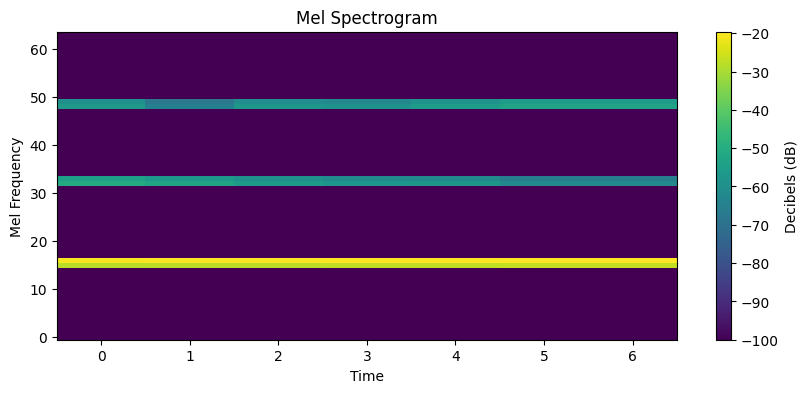

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/disgusted/64_anna_basilikum_142hz_1739457882631.0_26.wav--------------------------


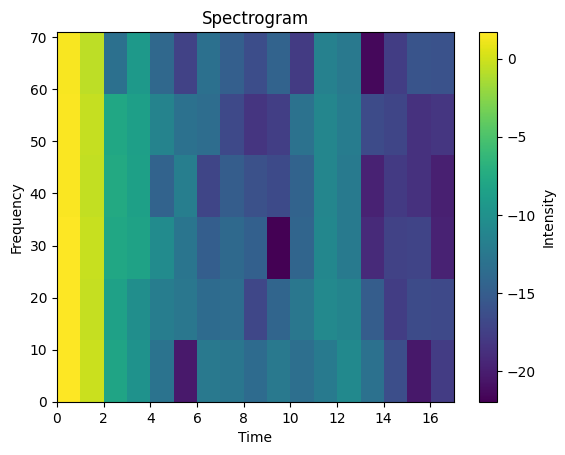

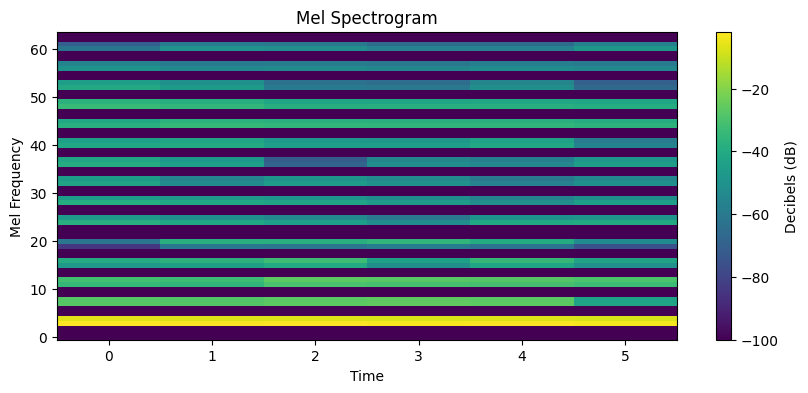

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/fearful/10_dreimasterblume_3mast_142hz_1738663966829.0_170.wav--------------------------


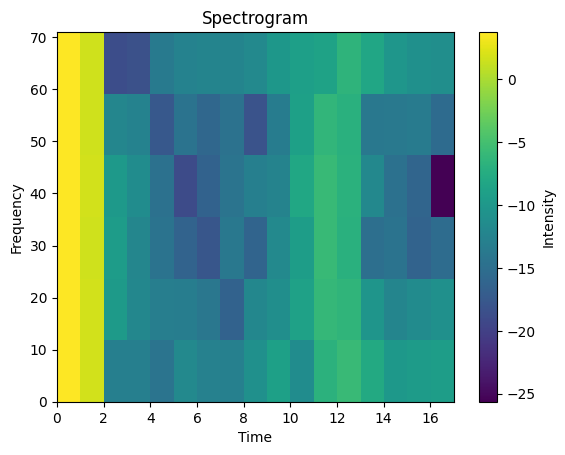

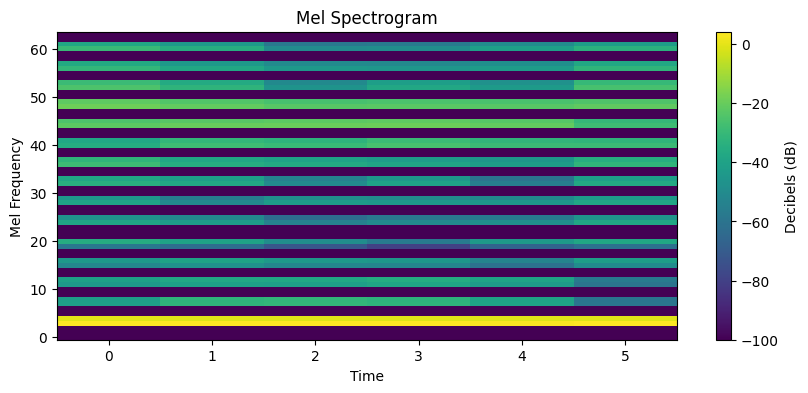

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/fearful/35_tttt_basilikum_142hz_1738763851569.0_10.wav--------------------------


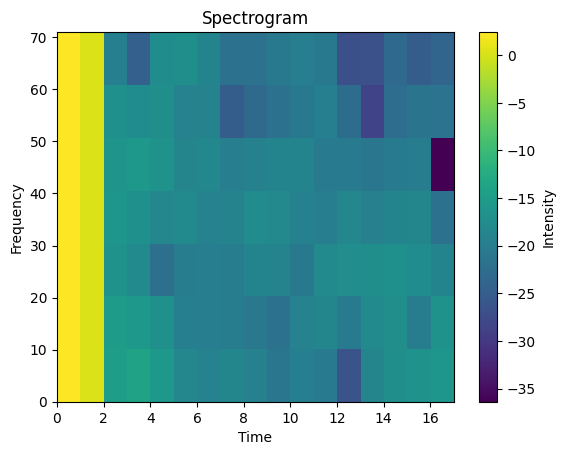

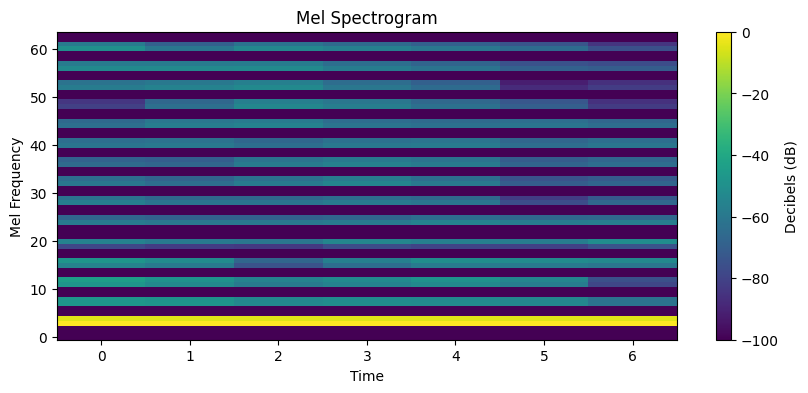

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/fearful/64_anna_basilikum_142hz_1739458124253.0_78.wav--------------------------


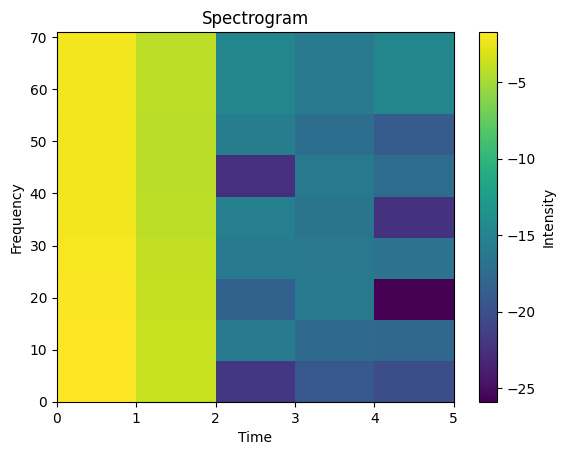

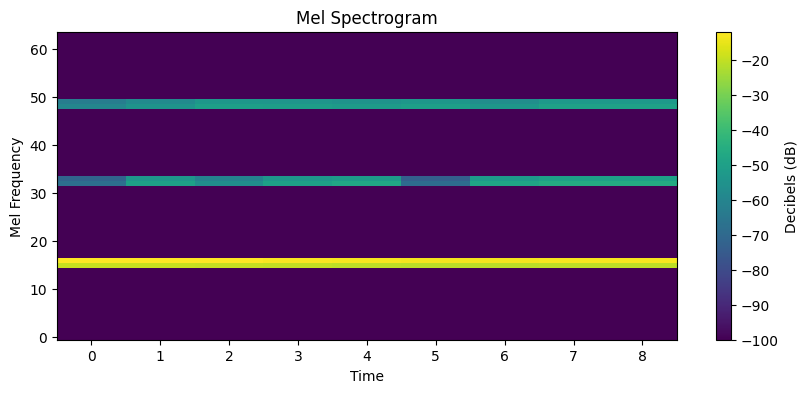

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/fearful/25_ggg_basilikum1_142hz_1738755018177.0_7.wav--------------------------


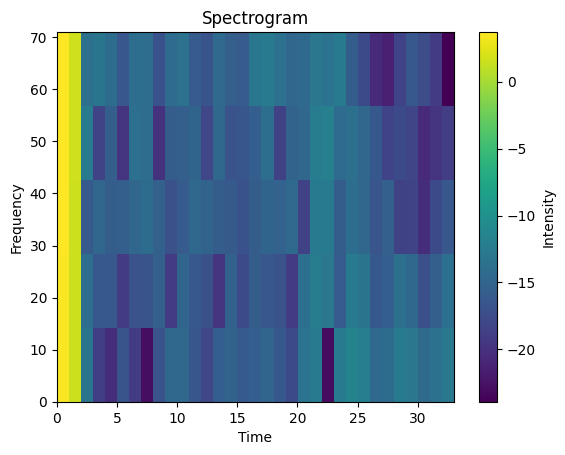

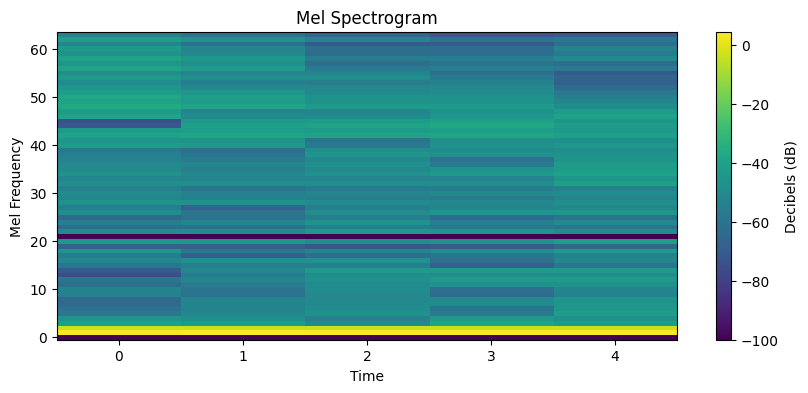

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/fearful/10_dreimasterblume_3mast_142hz_1738664032174.0_240.wav--------------------------


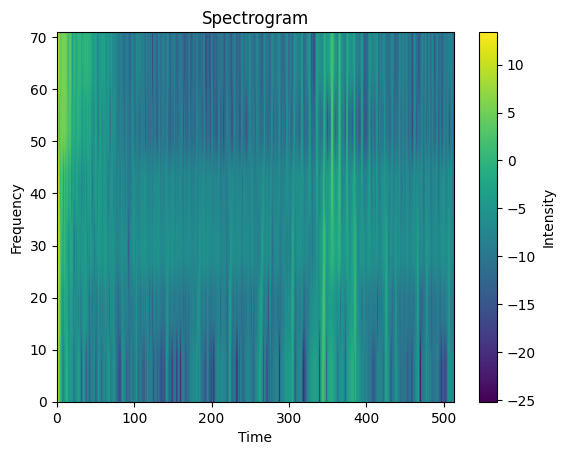

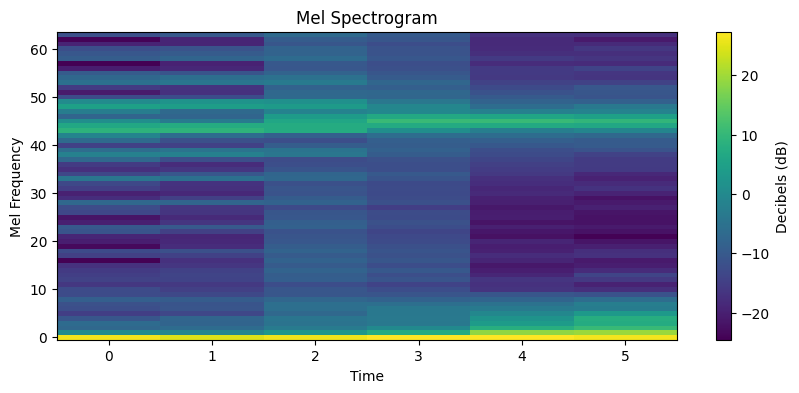

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/happy/60_jasmin_basilikum_142hz_1739448262639.0_63.wav--------------------------


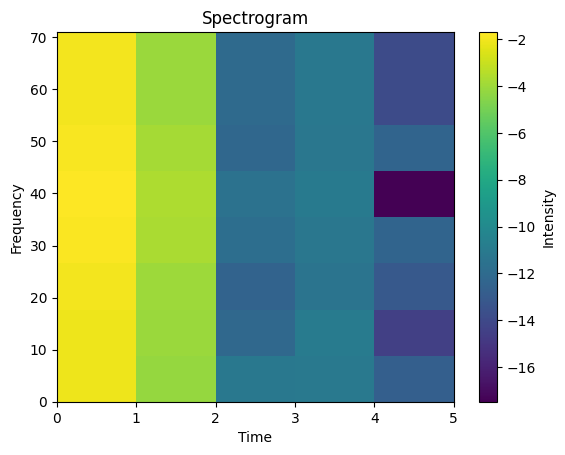

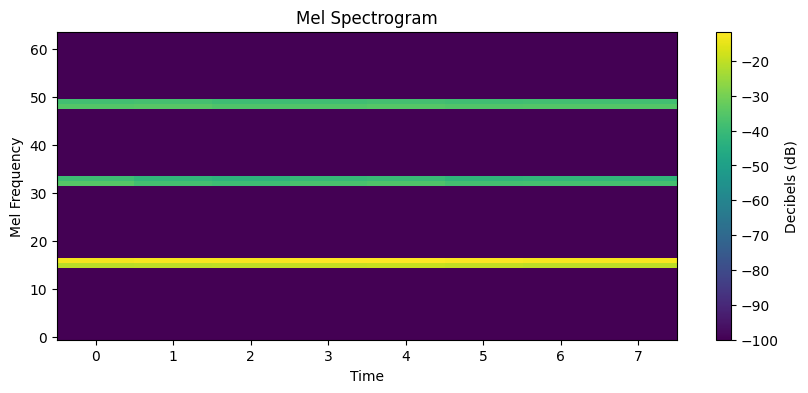

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/happy/10_dreimasterblume_3mast_142hz_1738664055758.0_258.wav--------------------------


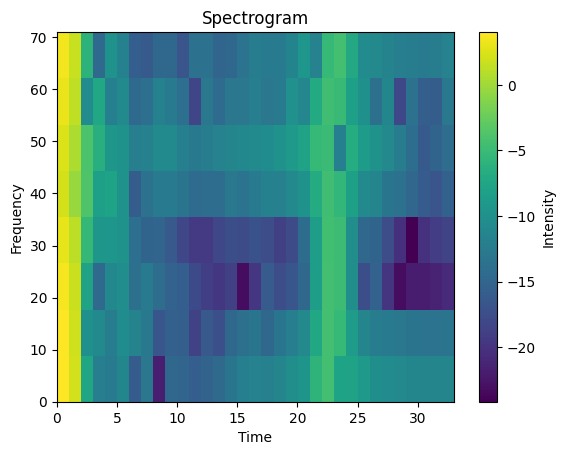

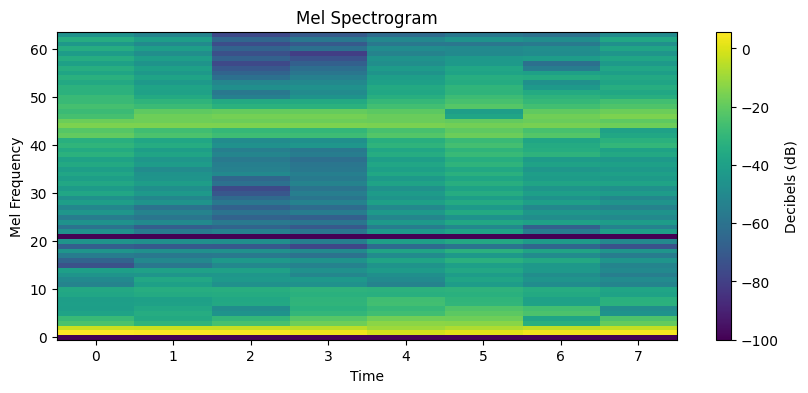

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/happy/44_lennart_basilikum_142hz_1739278330323.0_15.wav--------------------------


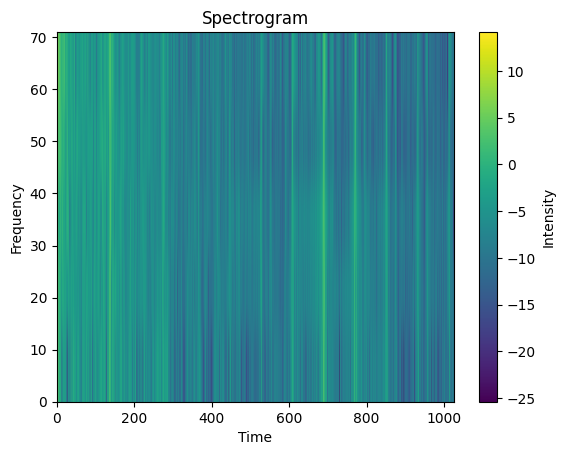

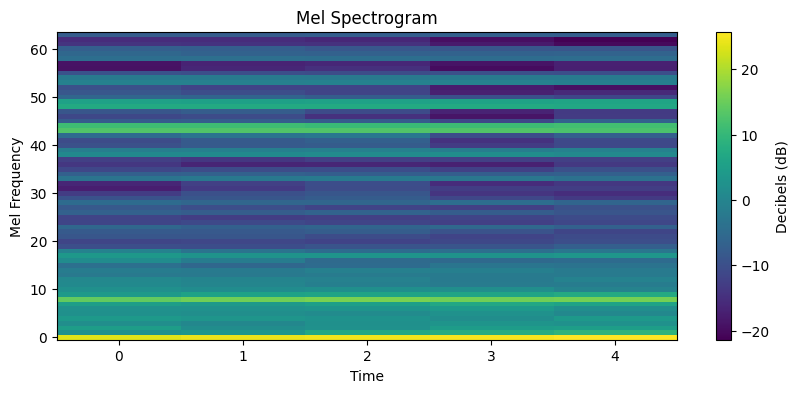

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/happy/12_philipp_basilikum_142hz_1738682633088.0_30.wav--------------------------


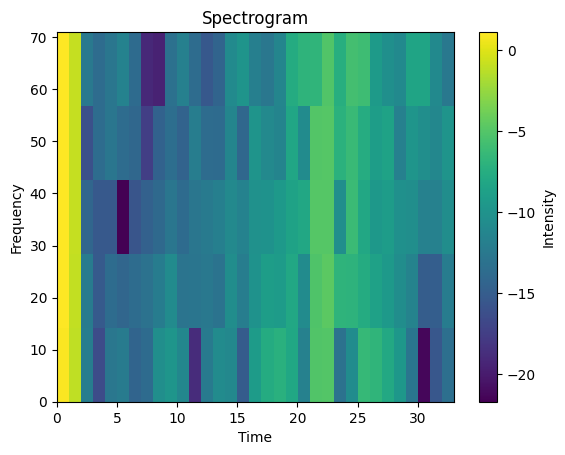

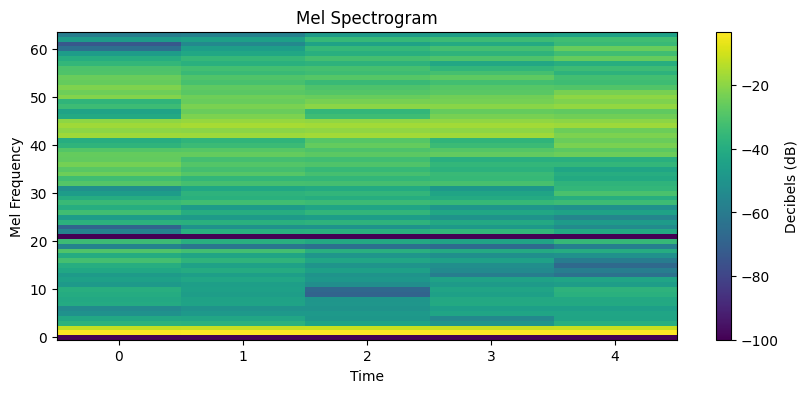

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/happy/10_dreimasterblume_3mast_142hz_1738664080698.0_280.wav--------------------------


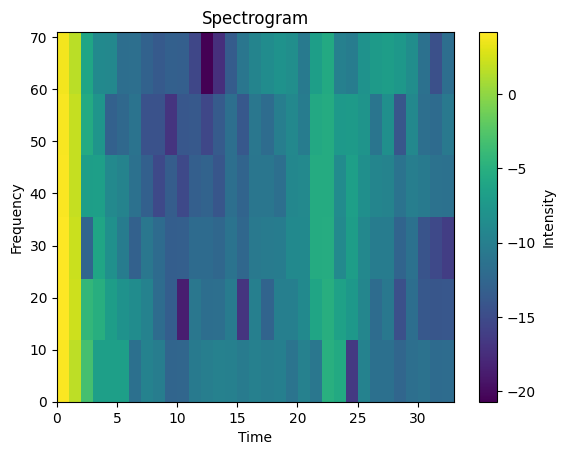

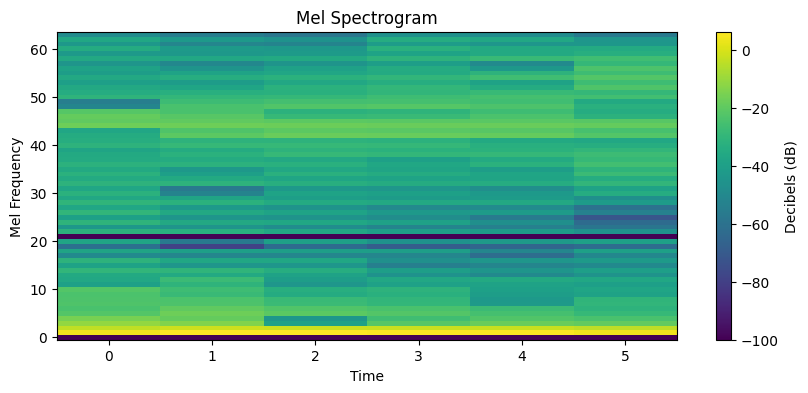

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/neutral/13_johannes_basilikum_142hz_1738683422969.0_8.wav--------------------------


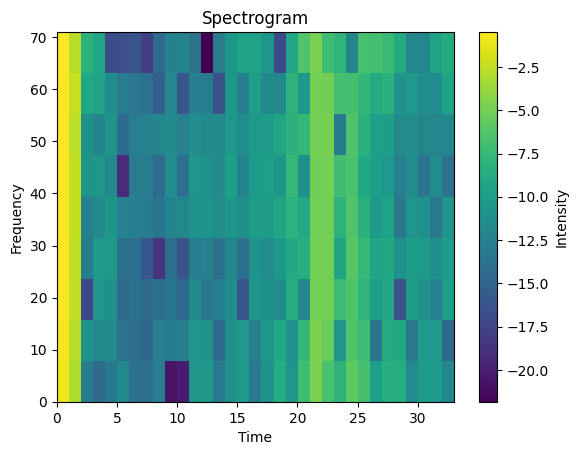

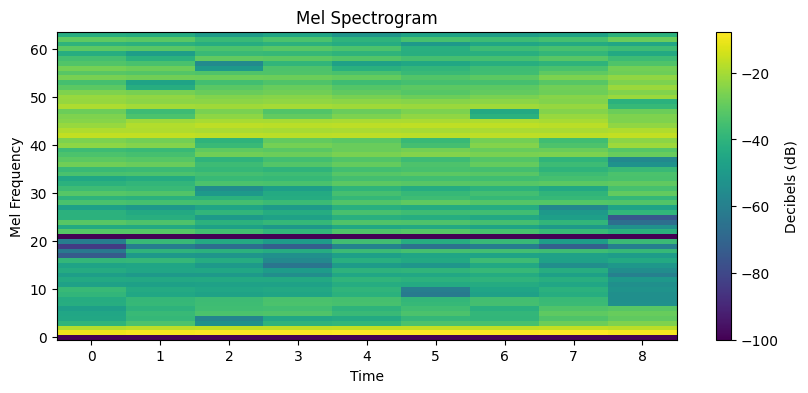

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/neutral/13_johannes_basilikum_142hz_1738683415455.0_6.wav--------------------------


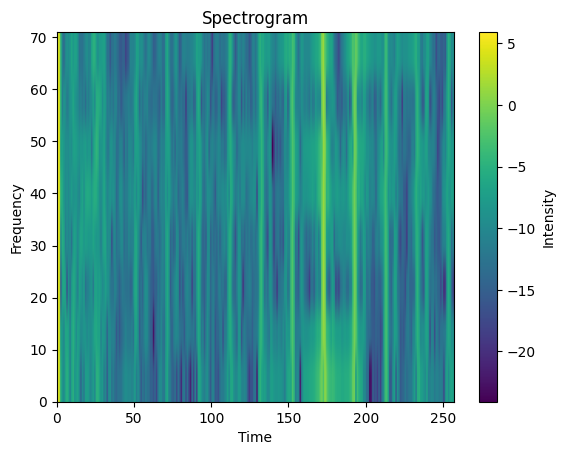

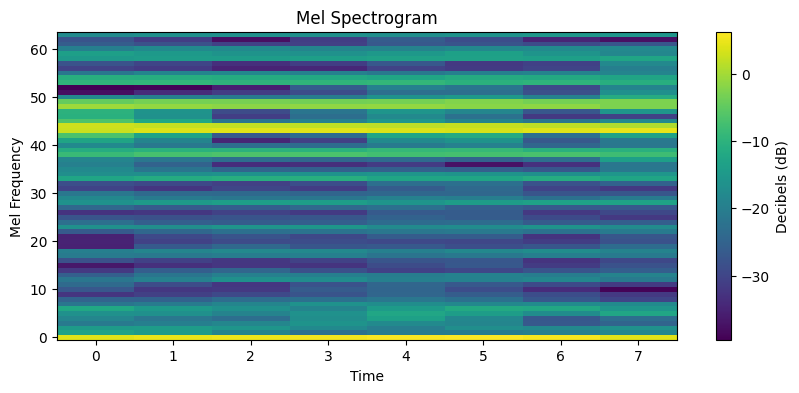

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/neutral/13_johannes_basilikum_142hz_1738683664108.0_30.wav--------------------------


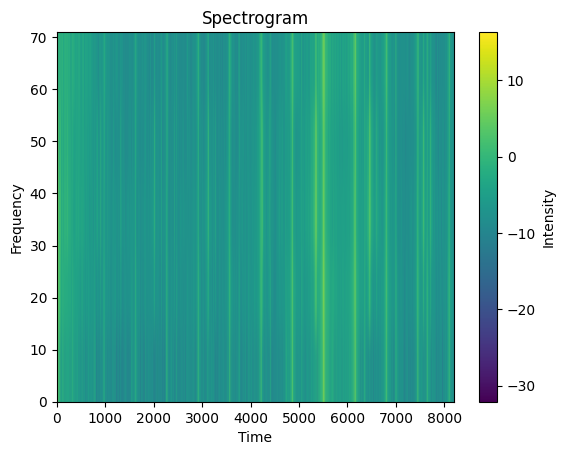

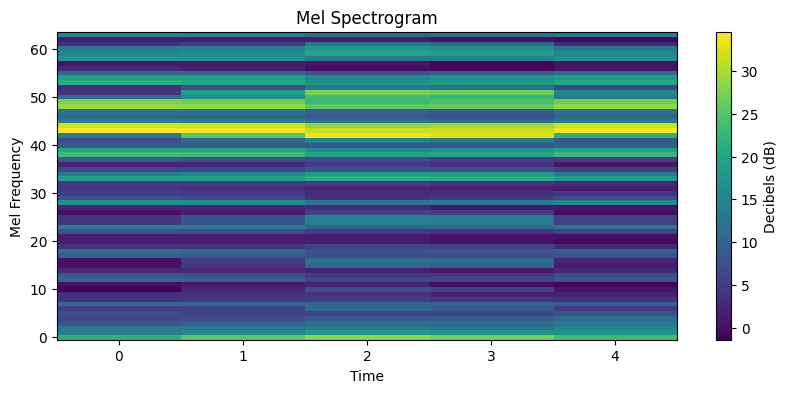

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/neutral/10_dreimasterblume_3mast_142hz_1738663766738.0_56.wav--------------------------


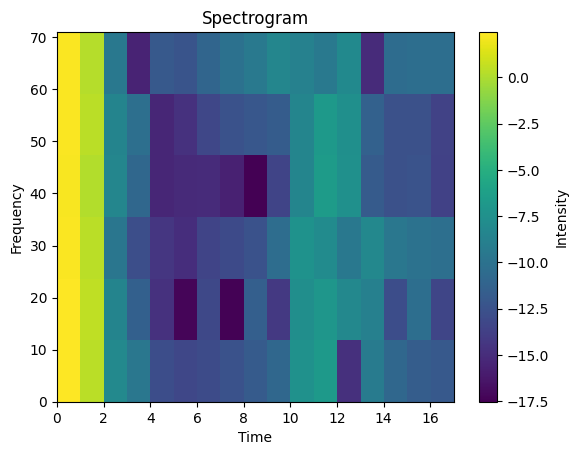

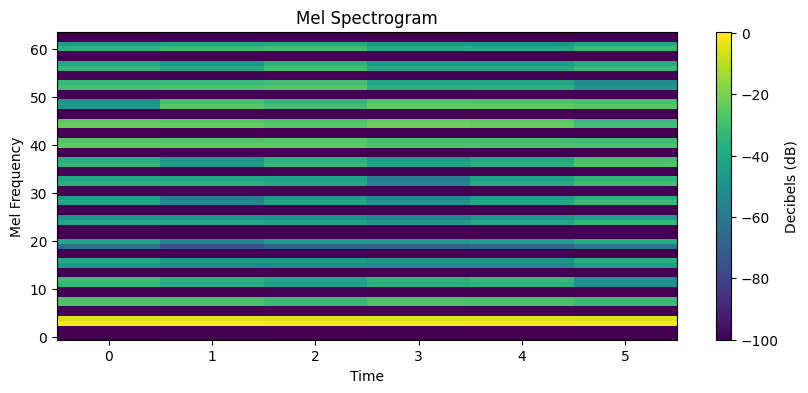

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/neutral/13_johannes_basilikum_142hz_1738683800007.0_34.wav--------------------------


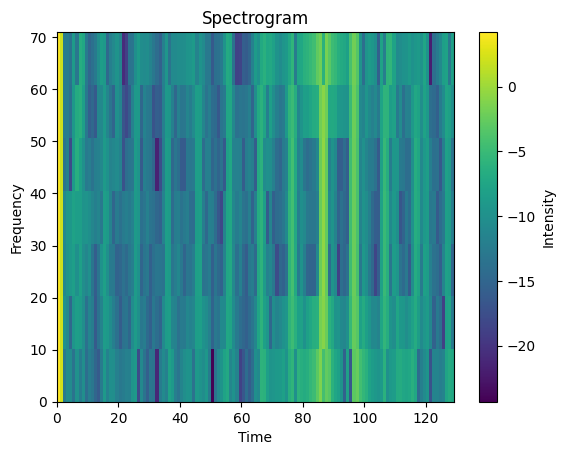

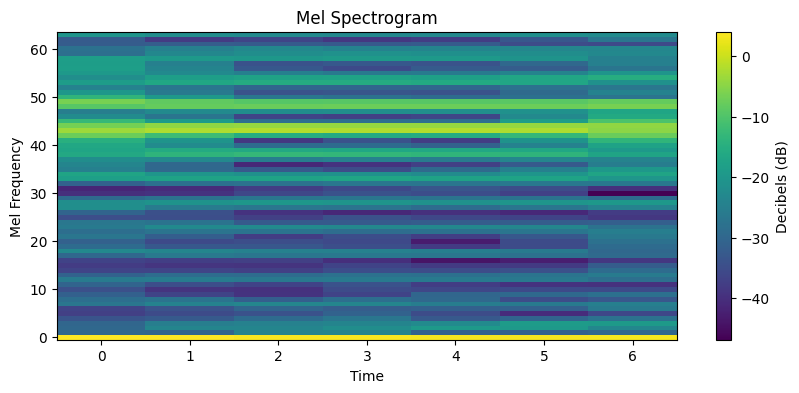

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/sad/basilikum_142hz_1738520880850_6_56.wav--------------------------


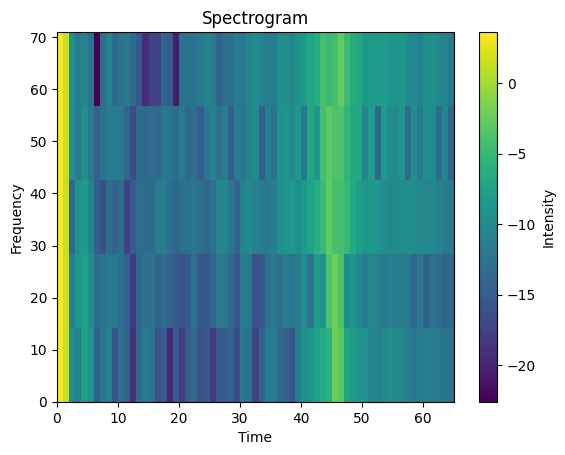

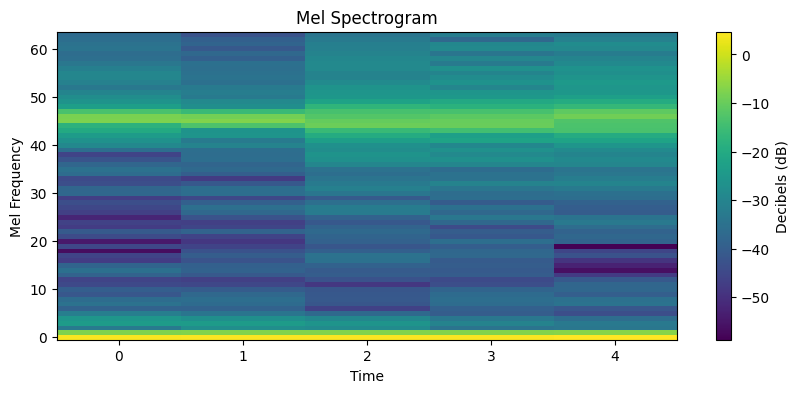

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/sad/58_annika_basilikum_142hz_1739444819871.0_120.wav--------------------------


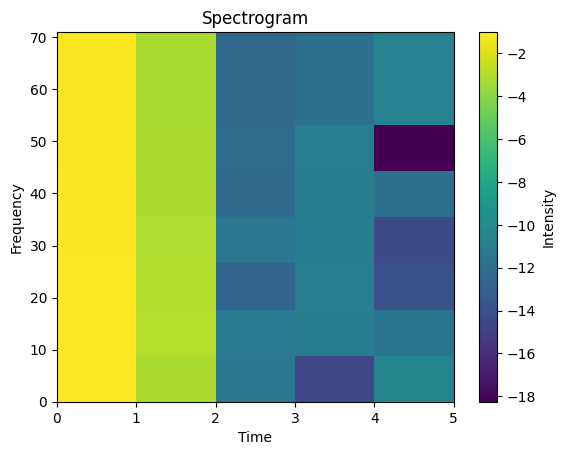

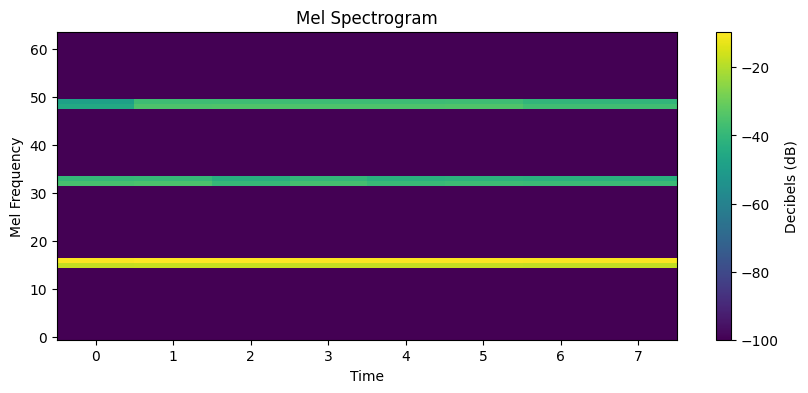

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/sad/29_nils_basilikum1_142hz_1738756012527.0_24.wav--------------------------


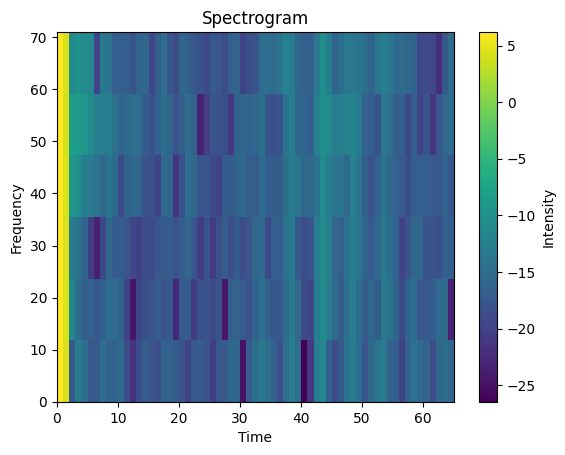

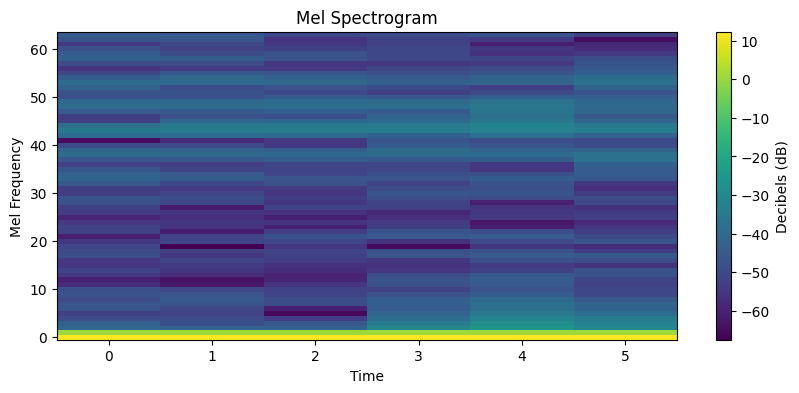

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/sad/31_manuel_basilikum1_150hz_1738756897761.0_80.wav--------------------------


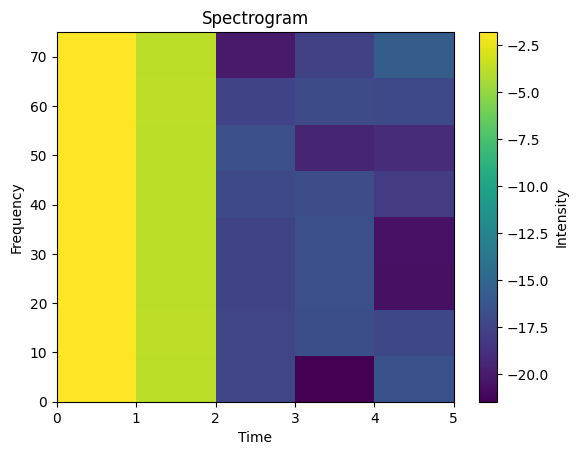

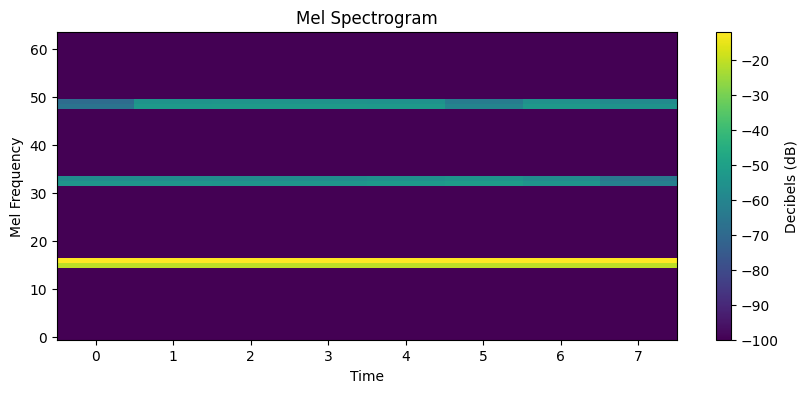

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/sad/13_johannes_basilikum_142hz_1738683802756.0_35.wav--------------------------


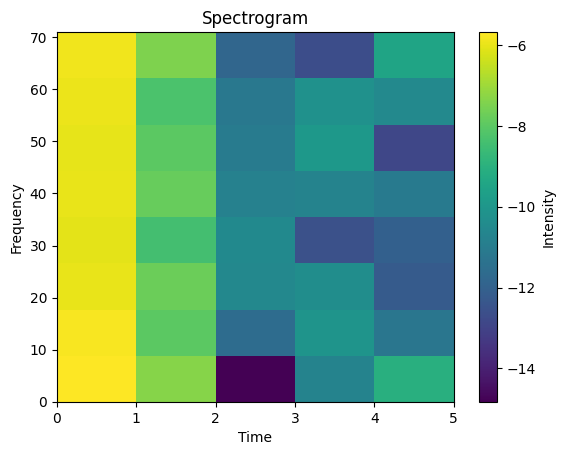

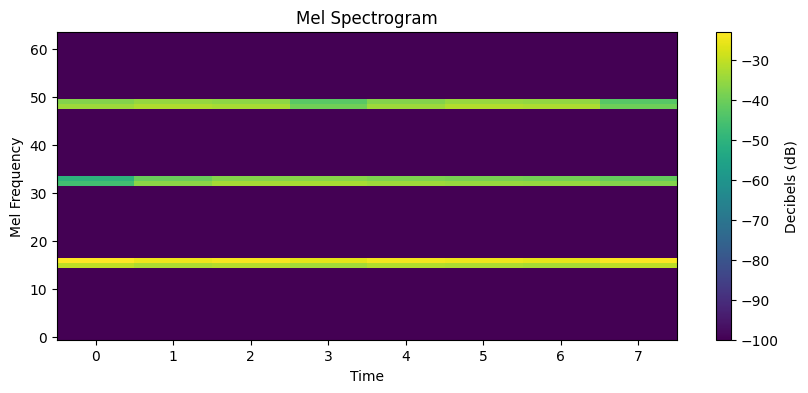

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/surprised/31_manuel_basilikum1_150hz_1738756816073.0_42.wav--------------------------


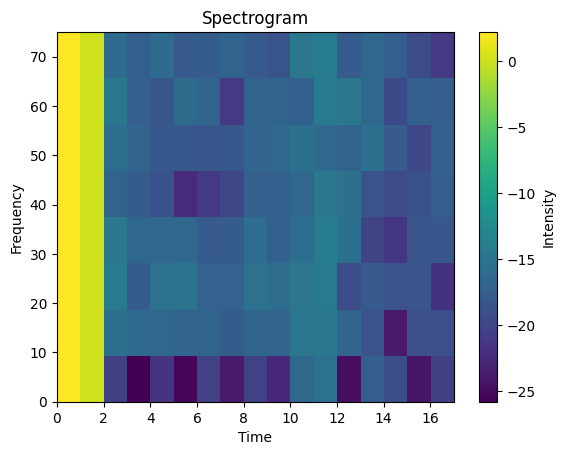

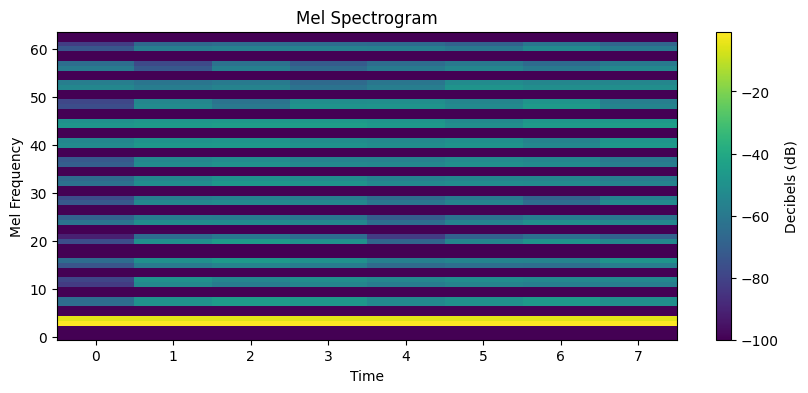

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/surprised/10_dreimasterblume_3mast_142hz_1738663840221.0_83.wav--------------------------


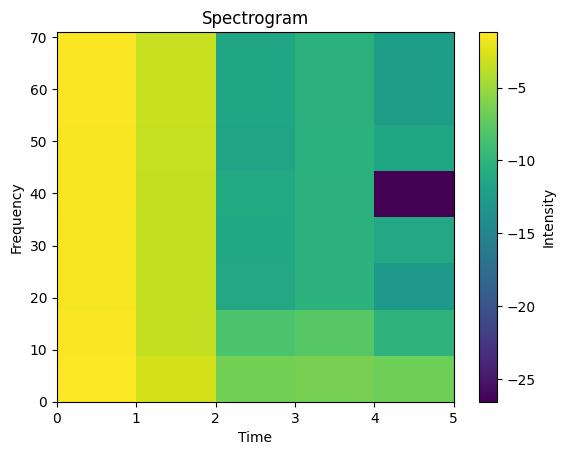

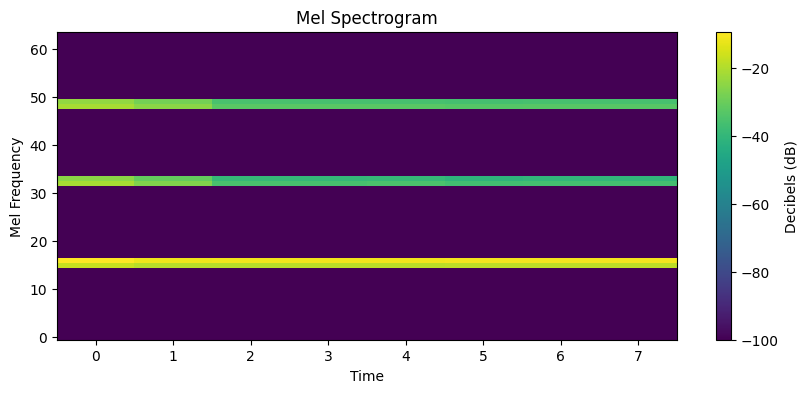

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/surprised/31_manuel_basilikum1_150hz_1738756678668.0_3.wav--------------------------


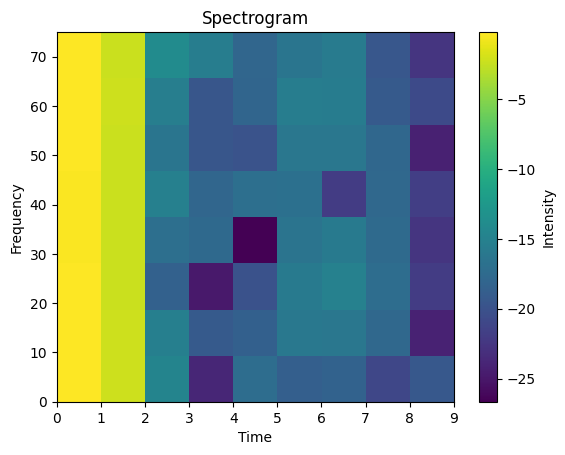

/home/dlonghi1_jm/Projects/plant_emotion_classification/venv/lib/python3.10/site-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (64) may be set too high. Or, the value for `n_freqs` (9) may be set too low.
  warnings.warn(


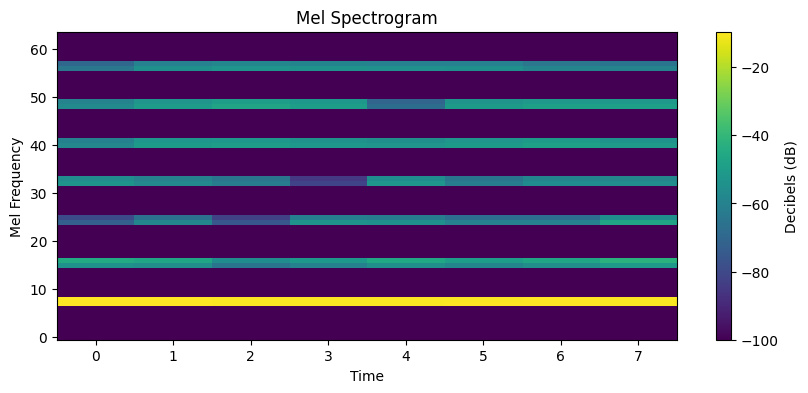

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/surprised/29_nils_basilikum1_142hz_1738756096131.0_56.wav--------------------------


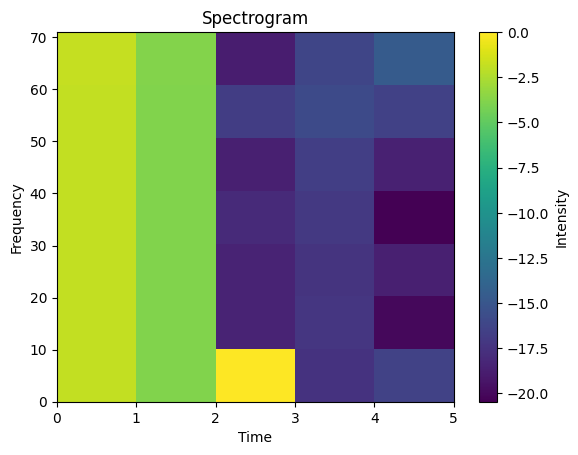

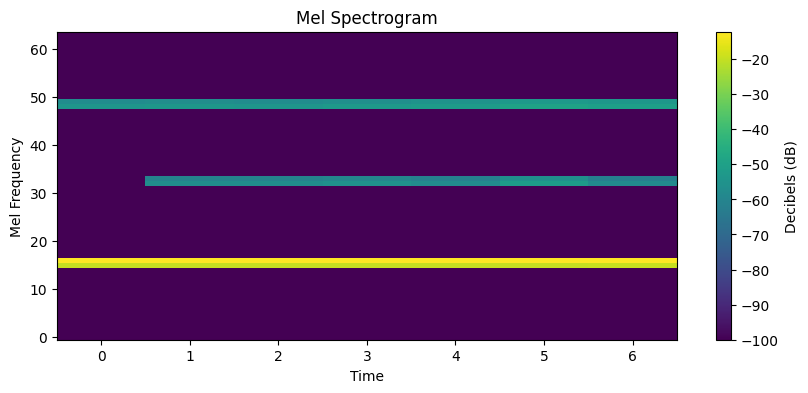

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/surprised/53_lars_basilikum_142hz_1739287770697.0_14.wav--------------------------


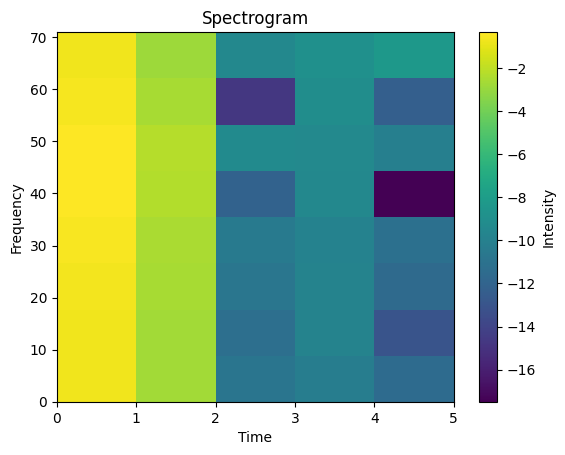

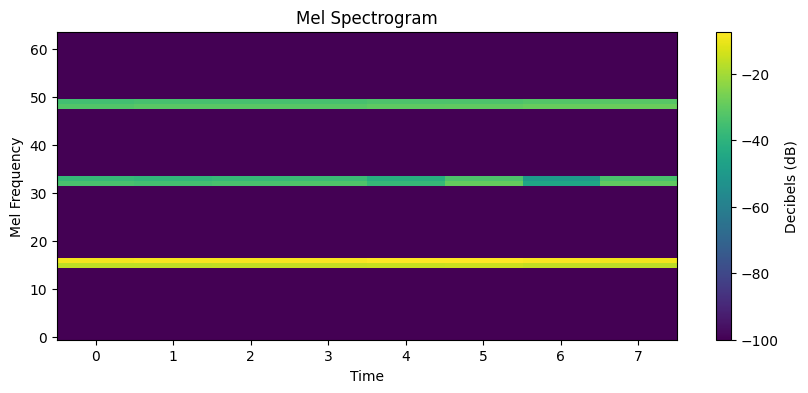

In [10]:
for file_path in file_paths:
    waveform, sample_rate = torchaudio.load(file_path)
    waveform = waveform + 1e-9

    print(f'-------------------------{file_path}--------------------------')

    spectrogram = create_spectrogram(waveform)
    n_fft = get_number_of_fourier_transform_bins(waveform)
    show_and_save_spectrogram_image(
        spectrogram=spectrogram,
        n_fft=n_fft,
        sample_rate=sample_rate,
        path=None
    )

    mel_spectrogram = create_mel_spectrogram(waveform, sample_rate)
    show_mel_spectrogram(mel_spectrogram)
    